In [1]:
# model
from tensorflow.python.keras.optimizers import RMSprop
from tensorflow.keras import layers, Model

height = 60
width = 34
LR = 0.001

img_input = layers.Input((height, width,  1))

x = layers.Conv2D(16, 3, activation='relu')(img_input)
# print(x.shape)
x = layers.MaxPool2D(2)(x)
# print(x.shape)

x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPool2D(2)(x)

x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPool2D(2)(x)

x = layers.Flatten()(x)

x = layers.Dense(512, activation='relu')(x)

x = layers.Dropout(0.5)(x)

# output = [layers.Dense(1, activation='softmax', name='c%d'%(i+1))(x) for i in range(4)]

output = layers.Dense(36, activation='softmax', name='output')(x)
# print(output[-1].shape)

model = Model(img_input, output)
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=LR),
              metrics=['accuracy']
              )

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
(36,)


In [2]:
# 数据流
import tensorflow as tf
import pathlib
from string import digits, ascii_lowercase
import numpy as np
import os
CHAPTER_LIST = digits + ascii_lowercase


def _get_file_name(path):
    return os.path.basename(path).split('_')[0].split('.')[0]


def _preprocess_image(image):
    image = tf.image.decode_jpeg(image, channels=1)
    image = tf.image.resize_images(image, [60, 34])
    image /= 255.0  # normalize to [0,1] range
    return image


def _load_and_preprocess_from_path_label(path, label):
    print(path, label)
    image = tf.read_file(path)
    return _preprocess_image(image), _flatten_labels(label)

def _str2idxlist(text):
    """
    text 转化为索引列表
    """

    return np.array([_idx2onehot(CHAPTER_LIST.index(i.lower())) for i in text])


def _idx2onehot(idx):
    tmp = np.zeros(len(CHAPTER_LIST))
    tmp[idx] = 1
    return tmp

def _flatten_labels(array):
    return tf.reshape(array, (36, ))


def get_dataset(data_dir, batch_size=50):
    root_path = pathlib.Path(data_dir)
    all_image_paths = [str(i) for i in root_path.glob('*.png')]
    all_image_labels = np.array([_str2idxlist(_get_file_name(i)) for i in all_image_paths])

    path_ds = tf.data.Dataset.from_tensor_slices((all_image_paths, all_image_labels))
    image_label_ds = path_ds.map(_load_and_preprocess_from_path_label)

    ds = image_label_ds.shuffle(buffer_size=100)
    ds = ds.repeat()
    ds = ds.batch(batch_size)
    return ds
    
# dataset = get_dataset('/Users/zhangzhichao/github/ContentSecurity-Analyzer/ml/captcha/splited/train/')

# iteror = dataset.make_one_shot_iterator()
# imgs, labels = iteror.get_next()
# print(imgs.shape)
# print(labels.shape)

Tensor("arg0:0", shape=(), dtype=float32) Tensor("arg1:0", shape=(), dtype=float64)


TypeError: Input 'filename' of 'ReadFile' Op has type float32 that does not match expected type of string.

In [3]:
# 数据流
import tensorflow as tf
import pathlib
from string import digits, ascii_lowercase
import numpy as np
import os
CHAPTER_LIST = digits + ascii_lowercase


def _get_file_name(path):
    return os.path.basename(path).split('_')[0].split('.')[0]


def _preprocess_image(image):
    image = tf.image.decode_jpeg(image, channels=1)
    image = tf.image.resize_images(image, [60, 34])
    image /= 255.0  # normalize to [0,1] range
    return image


def _load_and_preprocess_from_path_label(path, label):
    print(path, label)
    image = tf.read_file(path)
    return _preprocess_image(image), _flatten_labels(label)

def _str2idxlist(text):
    """
    text 转化为索引列表
    """

    return np.array([_idx2onehot(CHAPTER_LIST.index(i.lower())) for i in text])


def _idx2onehot(idx):
    tmp = np.zeros(len(CHAPTER_LIST))
    tmp[idx] = 1
    return tmp

def _flatten_labels(array):
    return tf.reshape(array, (36, ))


def get_dataset(data_dir, batch_size=50):
    root_path = pathlib.Path(data_dir)
    all_image_paths = [str(i) for i in root_path.glob('*.png')]
    all_image_labels = np.array([_str2idxlist(_get_file_name(i)) for i in all_image_paths])

    path_ds = tf.data.Dataset.from_tensor_slices((all_image_paths, all_image_labels))
    image_label_ds = path_ds.map(_load_and_preprocess_from_path_label)

    ds = image_label_ds.shuffle(buffer_size=100)
    ds = ds.repeat()
    ds = ds.batch(batch_size)
    return ds
    
dataset = get_dataset('/Users/zhangzhichao/github/ContentSecurity-Analyzer/ml/captcha/splited/train/')

# iteror = dataset.make_one_shot_iterator()
# imgs, labels = iteror.get_next()
# print(imgs.shape)
# print(labels.shape)

Tensor("arg0:0", shape=(), dtype=float32) Tensor("arg1:0", shape=(), dtype=float64)


TypeError: Input 'filename' of 'ReadFile' Op has type float32 that does not match expected type of string.

Tensor("arg0:0", shape=(), dtype=string) Tensor("arg1:0", shape=(1, 36), dtype=float64)
Tensor("arg0:0", shape=(), dtype=string) Tensor("arg1:0", shape=(1, 36), dtype=float64)
Epoch 1/30
 - 43s - loss: 0.1057 - acc: 0.9746 - val_loss: 0.9850 - val_acc: 0.8743
Epoch 2/30
 - 43s - loss: 0.1008 - acc: 0.9757 - val_loss: 1.2335 - val_acc: 0.8758
Epoch 3/30
 - 43s - loss: 0.0994 - acc: 0.9753 - val_loss: 1.3327 - val_acc: 0.8734
Epoch 4/30
 - 43s - loss: 0.1030 - acc: 0.9759 - val_loss: 1.2108 - val_acc: 0.8726
Epoch 5/30
 - 43s - loss: 0.0978 - acc: 0.9767 - val_loss: 1.1064 - val_acc: 0.8796
Epoch 6/30
 - 43s - loss: 0.1048 - acc: 0.9752 - val_loss: 0.9478 - val_acc: 0.8819
Epoch 7/30
 - 43s - loss: 0.1028 - acc: 0.9765 - val_loss: 1.2083 - val_acc: 0.8766
Epoch 8/30
 - 43s - loss: 0.0996 - acc: 0.9766 - val_loss: 1.2826 - val_acc: 0.8804
Epoch 9/30
 - 43s - loss: 0.1021 - acc: 0.9766 - val_loss: 1.1959 - val_acc: 0.8809
Epoch 10/30
 - 43s - loss: 0.1011 - acc: 0.9773 - val_loss: 1.2912 -

Text(0.5,1,'Loss')

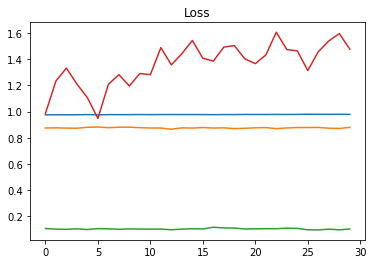

In [5]:
%matplotlib inline
# train


import datasets.base as input_data
import matplotlib.pyplot as plt
import os

data_dir = '/home/moon/traindata/splited'
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')

batch_size = 50

train_dataset = get_dataset(train_dir)
# train_iteror = train_dataset.make_one_shot_iterator()

test_dataset = get_dataset(test_dir, 2000)
# test_iteror = test_dataset.make_one_shot_iterator()

history = model.fit(
    train_dataset,
    steps_per_epoch=1000,
    epochs=30,
    validation_data=test_dataset,
    validation_steps=50,
    verbose=2,
)

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Accuracy')

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Loss')

In [6]:
# 保存
model.save_weights('./weights/my_model')


Consider using a TensorFlow optimizer from `tf.train`.
Instructions for updating:
Use tf.train.CheckpointManager to manage checkpoints rather than manually editing the Checkpoint proto.


In [41]:
# predict
import numpy as np
from PIL import Image
import cv2

path = '/home/moon/traindata/splited/test/6_ebd8cef609394a908254b84ef52e63f2.png'
# image = tf.read_file(path)
# image = _preprocess_image(image)
image = cv2.imread(path)
gray_src = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(gray_src.shape)
# print(image.shape)
image = np.expand_dims(gray_src, axis=0)
image.resize((1, 60, 34, 1))
print(image.shape)
ret = model.predict([image], steps=10000)
print(ret.shape)

print(CHAPTER_LIST[np.argmax(ret[-1])])

(60, 34)
(1, 60, 34, 1)
(10000, 36)
6


In [43]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 60, 34, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 58, 32, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 29, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 7, 32)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 5, 64)         18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 2, 64)          0         
__________

In [45]:
validate_dir = '/home/moon/traindata/splited_validate/train'
dataset = get_dataset(validate_dir)
ret = model.evaluate(dataset, steps=10000)

Tensor("arg0:0", shape=(), dtype=string) Tensor("arg1:0", shape=(1, 36), dtype=float64)
10000/10000 [==============================] - 99s 10ms/step - loss: 1.5734 - acc: 0.8723
